# 3. ESDA with rgeoda and sf

Previous R note shows you:

1. how to do ESDA with rGeoDa and sp by computing the local spatial statistics (LISA) of variable hr60 and creating a LISA cluster map.

Another modern and popular routine for spatial data analysis with R is to use sf library to process geospatial dataset, analyze spatial data and plot the results on maps.

rgeoda also provides utility functions to create a rgeoda instance from sf object.

In this note, I will demonstrate how to work with sf and rgeoda packages to do exploratory spatial data analysis.

## Start from sf package

The sf package has been popular tool to handle geospatial data. It is a good substitue of sp package which will be deprecated soon.

One can use sf to load geospatial data (e.g. a ESRI Shapefile) directly:

In [1]:
guerry_path <- system.file("extdata", "Guerry.shp", package = "rgeoda")

In [2]:
library(sf)

Linking to GEOS 3.6.1, GDAL 2.1.3, PROJ 4.9.3


Using `st_read()` function to read Guerry.shp file and this function will returns an `sf` object.

In [3]:
guerry_sf <- st_read(guerry_path)

Reading layer `Guerry' from data source `/Library/Frameworks/R.framework/Versions/3.5/Resources/library/rgeoda/extdata/Guerry.shp' using driver `ESRI Shapefile'
Simple feature collection with 85 features and 26 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: 47680 ymin: 1703258 xmax: 1031401 ymax: 2677441
epsg (SRID):    NA
proj4string:    +proj=lcc +lat_1=46.8 +lat_0=46.8 +lon_0=0 +k_0=0.99987742 +x_0=600000 +y_0=2200000 +a=6378249.2 +b=6356514.999904194 +pm=2.33722917 +units=m +no_defs


You can simply call plot() function to render the first 9 chorepleth maps using the frist 9 variables in the dataset:



Warning message:
“plotting the first 9 out of 26 attributes; use max.plot = 26 to plot all”

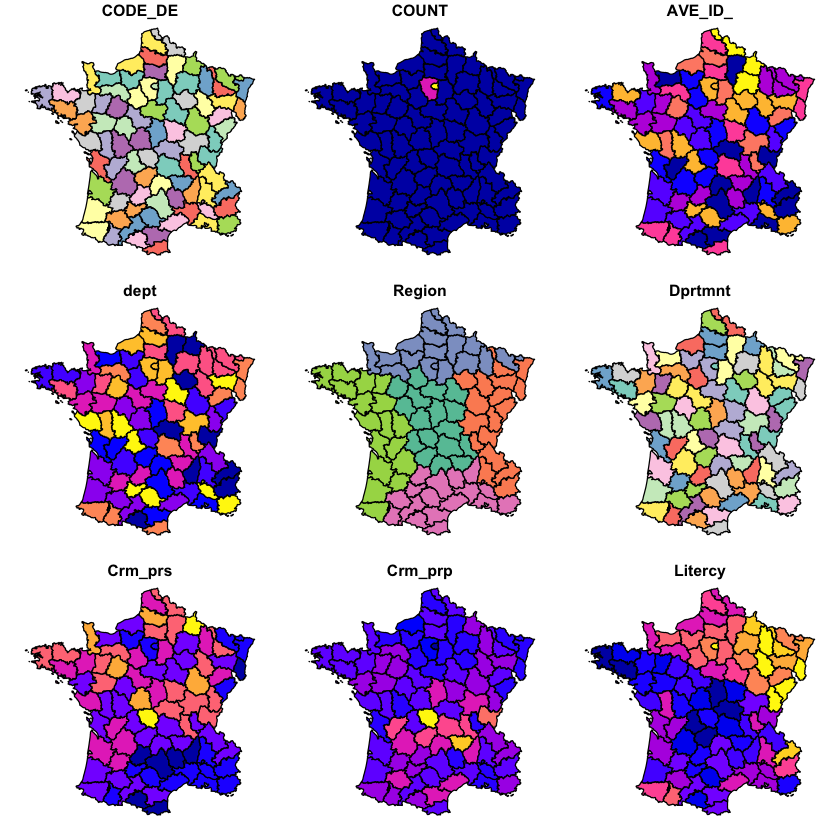

In [4]:
plot(guerry_sf)

## Create rgeoda object from sf

sf package makes it easy to work with geospatial data. It also provides functions to do basic spatial data analysis. rgeoda provides helper function `sf_to_geoda` to create a GeoDa instance from a sf object. Users can then call GeoDa functions to do further spatial data analysis.



In [5]:
library(rgeoda)

guerry_gda <- sf_to_geoda(guerry_sf)

Loading required package: wkb


rgeoda uses wkb, which is a binary representation of geometries, to exchange data between sf and libgeoda in memory.

## ESDA with rgeoda and sf

Now, with the rgeoda object `guerry_gda`, you can call GeoDa’s spatial analysis functions. For example, to examine the local Moran of variable “crm_prs” (Population per Crime against persons):



In [6]:
queen_w <- guerry_gda$CreateContiguityWeights()
crm_lisa <- guerry_gda$LISA(queen_w, as.numeric(paste(guerry_sf$Crm_prs)))
crm_lisa_clusters <- crm_lisa$GetClusterIndicators()

Now, with the LISA results, we can do exploratory spatial data analysis by generating a LISA cluster map:



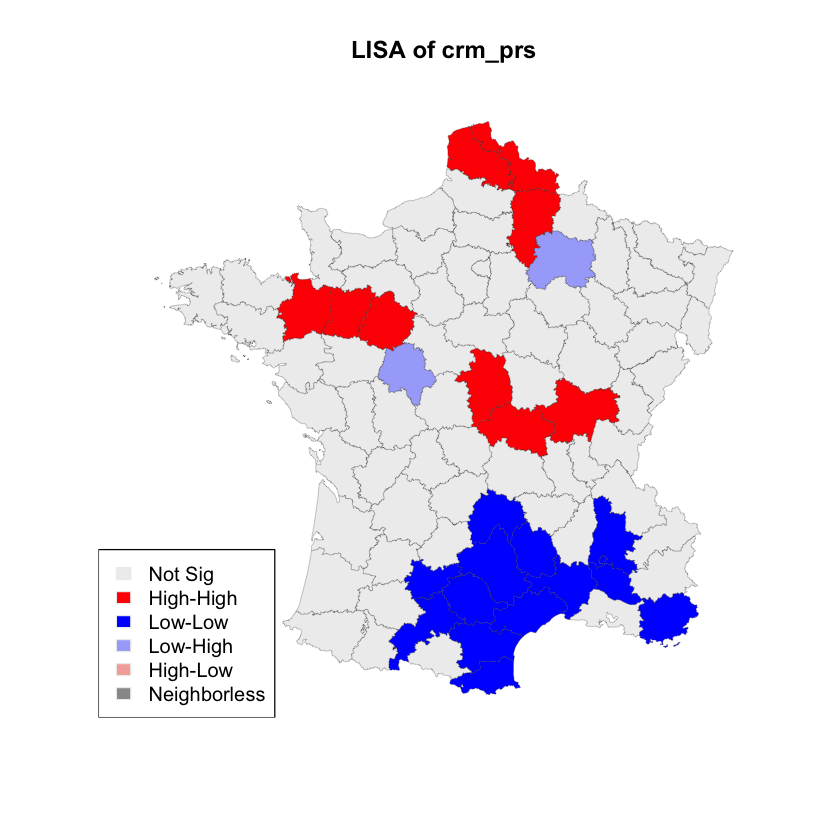

In [8]:
lisa_colors <- c("#eeeeee","#FF0000","#0000FF","#a7adf9", "#f4ada8", "#999999")
lisa_labels <- c("Not Sig", "High-High", "Low-Low", "Low-High","High-Low", "Neighborless")

colors <- sapply(crm_lisa_clusters, function(x){return(lisa_colors[[x+1]])})
plot(st_geometry(guerry_sf), col = colors, border = "#333333", lwd=0.2)
title(main = "LISA of crm_prs")
legend('bottomleft', legend = lisa_labels, 
       fill = lisa_colors, border = "#eeeeee")

From the above code, you can see that we still use `sf` object to do plotting. The values of cluster indicators from rgeoda’s LISA object are used to make the LISA map.

You can easily append the lisa results to original sf object by manipulating the data.frame object inside the sf object.

We then create an array of hex color, each observation is set to a hex color according to its cluster indicator value.

In [9]:
sapply(crm_lisa_clusters, function(x){return(lisa_colors[[x+1]])})


[1] "#eeeeee" "#FF0000" "#FF0000" "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee"
 [8] "#eeeeee" "#eeeeee" "#0000FF" "#0000FF" "#eeeeee" "#eeeeee" "#0000FF"
[15] "#eeeeee" "#eeeeee" "#FF0000" "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee"
[22] "#eeeeee" "#eeeeee" "#0000FF" "#eeeeee" "#eeeeee" "#eeeeee" "#0000FF"
[29] "#0000FF" "#eeeeee" "#eeeeee" "#0000FF" "#FF0000" "#eeeeee" "#a7adf9"
[36] "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee"
[43] "#eeeeee" "#eeeeee" "#eeeeee" "#0000FF" "#eeeeee" "#eeeeee" "#a7adf9"
[50] "#eeeeee" "#FF0000" "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee"
[57] "#FF0000" "#eeeeee" "#eeeeee" "#FF0000" "#eeeeee" "#eeeeee" "#eeeeee"
[64] "#0000FF" "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee" "#FF0000" "#FF0000"
[71] "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee" "#0000FF"
[78] "#0000FF" "#0000FF" "#0000FF" "#eeeeee" "#eeeeee" "#eeeeee" "#eeeeee"
[85] "#eeeeee"

If you check the values of the cluster indicators, you will see they are integer numbers 0 (not significant), 1 (high-high cluster), 2 (low-low cluster), 3 (low-high cluster), 4 (high-low cluster), 5 (neighborless/island), 6 (undefined), which are excatly the same with GeoDa software when you save LISA results to a table:

In [10]:
crm_lisa_clusters

[1] 0 1 1 0 0 0 0 0 0 2 2 0 0 2 0 0 1 0 0 0 0 0 0 2 0 0 0 2 2 0 0 2 1 0 3 0 0 0
[39] 0 0 0 0 0 0 0 2 0 0 3 0 1 0 0 0 0 0 1 0 0 1 0 0 0 2 0 0 0 0 1 1 0 0 0 0 0 0
[77] 2 2 2 2 0 0 0 0 0

We also specify what color is associated with which cluster value to replace the lisa_colors and lisa_labels, which are defined in sf_geoda.R:

'''
lisa_colors <- c("#eeeeee","#FF0000","#0000FF","#a7adf9", "#f4ada8", "#999999")
'''